# News Evaluation and Sentimental Analysis of Headlines

The Natural Language Toolkit (NLTK) is a Python library for handling natural language processing (NLP).

This project aims to evaluate the headlines of the Indiatoday & indianexpress newspaper and see how the words like (COVID, Virus,farmers, Rahul and Modi) have taken on relevance over today newspaper.

I will cover the following topics in this project:

Installing NLTK and its modules
Text preprocessing and exploratory analysis
Top words mentioned
The project will contain:



In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install nltk
#!pip install 
#!pip install WordCloud

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from datetime import date
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import requests

# Scrapping the website

In [ ]:
def get_heading(pageurl,path):
    headline=[]
    Tdate=[]
    for i in range(0,15): 
        url=pageurl+str(i)
        response=requests.get(url)
        content=response.text
        soup=BeautifulSoup(content)
        
        for x in soup.select(path):
            if x is None:
                headline.append(np.NaN)
                Tdate.append(date.today())
            else:
                headline.append(x.text)
                Tdate.append(date.today())
    #Visualising Dataset
    data=pd.DataFrame({'Date':Tdate,'Headlines':headline})
    return data


IT=get_heading('https://www.indiatoday.in/india?page=','div.detail>h2')


IT_world=get_heading('https://www.indiatoday.in/world?page=','div.detail>h2')


IE=get_heading('https://indianexpress.com/section/india/page/','h2.title>a')


IE_world=get_heading('https://indianexpress.com/section/world/page/','h3>a')


finaldf=pd.concat([IT,IT_world,IE,IE_world]).reset_index(drop=True)

#finaldf.to_csv('news.csv')

Empty DataFrame
Columns: [Date, Headlines]
Index: []


In [ ]:
#finaldf.to_csv("raw_news_headlines.csv")

finaldf=pd.read_csv("raw_news_headlines.csv")
print(finaldf)

Empty DataFrame
Columns: [Date, Headlines]
Index: []


In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1095 non-null   int64 
 1   Date        1095 non-null   object
 2   Headlines   1095 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.8+ KB


In [ ]:
finaldf.index

RangeIndex(start=0, stop=1095, step=1)

In [ ]:
finaldf.shape

(1095, 3)

In [ ]:
#nltk.download()

In [ ]:
sentences = finaldf['Headlines'].str.cat(sep = ' ')
sentences

"Watch: Param Bir Singh appears before crime branch, Sachin Vaze makes startling claim Chennai: Cops rescue woman being sexually assaulted in moving car, one held If sentiments are hurt, read something better: Delhi HC on plea seeking ban on Salman Khurshid's book INS Vela: Fourth Scorpene-class submarine commissioned into Indian Navy | In Pics Threatening emails to Gautam Gambhir traced to Pakistan, say Delhi Police sources Tamil Nadu: Teacher ends life over student's suicide Watch: Navy commissions INS Vela, submarine to give teeth to naval prowess With Jewar airport, UP to become first Indian state to have 5 international airports PM Modi to lay foundation stone of Jewar airport shortly | LIVE Tripura civic polls: Supreme Court orders deployment of additional Central forces INS Vela: Meet the newest keeper of India’s seas | Video Watch: Param Bir Singh lands in Mumbai to join probe | Exclusive After TMC, now CPI(M) moves Supreme Court over Tripura violence Mumbai: Shakti Mills gang-

In [ ]:
sentences = sentences.lower()
sentences

"watch: param bir singh appears before crime branch, sachin vaze makes startling claim chennai: cops rescue woman being sexually assaulted in moving car, one held if sentiments are hurt, read something better: delhi hc on plea seeking ban on salman khurshid's book ins vela: fourth scorpene-class submarine commissioned into indian navy | in pics threatening emails to gautam gambhir traced to pakistan, say delhi police sources tamil nadu: teacher ends life over student's suicide watch: navy commissions ins vela, submarine to give teeth to naval prowess with jewar airport, up to become first indian state to have 5 international airports pm modi to lay foundation stone of jewar airport shortly | live tripura civic polls: supreme court orders deployment of additional central forces ins vela: meet the newest keeper of india’s seas | video watch: param bir singh lands in mumbai to join probe | exclusive after tmc, now cpi(m) moves supreme court over tripura violence mumbai: shakti mills gang-

In [ ]:
print(len(sentences))

78986


### Word tokenizer

In [ ]:
from nltk.tokenize import word_tokenize

tok_df = word_tokenize(sentences)
tok_df

['watch',
 ':',
 'param',
 'bir',
 'singh',
 'appears',
 'before',
 'crime',
 'branch',
 ',',
 'sachin',
 'vaze',
 'makes',
 'startling',
 'claim',
 'chennai',
 ':',
 'cops',
 'rescue',
 'woman',
 'being',
 'sexually',
 'assaulted',
 'in',
 'moving',
 'car',
 ',',
 'one',
 'held',
 'if',
 'sentiments',
 'are',
 'hurt',
 ',',
 'read',
 'something',
 'better',
 ':',
 'delhi',
 'hc',
 'on',
 'plea',
 'seeking',
 'ban',
 'on',
 'salman',
 'khurshid',
 "'s",
 'book',
 'ins',
 'vela',
 ':',
 'fourth',
 'scorpene-class',
 'submarine',
 'commissioned',
 'into',
 'indian',
 'navy',
 '|',
 'in',
 'pics',
 'threatening',
 'emails',
 'to',
 'gautam',
 'gambhir',
 'traced',
 'to',
 'pakistan',
 ',',
 'say',
 'delhi',
 'police',
 'sources',
 'tamil',
 'nadu',
 ':',
 'teacher',
 'ends',
 'life',
 'over',
 'student',
 "'s",
 'suicide',
 'watch',
 ':',
 'navy',
 'commissions',
 'ins',
 'vela',
 ',',
 'submarine',
 'to',
 'give',
 'teeth',
 'to',
 'naval',
 'prowess',
 'with',
 'jewar',
 'airport',
 ','

### Remove punctution

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
tok_df = [char for char in tok_df if char not in string.punctuation]
tok_df

['watch',
 'param',
 'bir',
 'singh',
 'appears',
 'before',
 'crime',
 'branch',
 'sachin',
 'vaze',
 'makes',
 'startling',
 'claim',
 'chennai',
 'cops',
 'rescue',
 'woman',
 'being',
 'sexually',
 'assaulted',
 'in',
 'moving',
 'car',
 'one',
 'held',
 'if',
 'sentiments',
 'are',
 'hurt',
 'read',
 'something',
 'better',
 'delhi',
 'hc',
 'on',
 'plea',
 'seeking',
 'ban',
 'on',
 'salman',
 'khurshid',
 "'s",
 'book',
 'ins',
 'vela',
 'fourth',
 'scorpene-class',
 'submarine',
 'commissioned',
 'into',
 'indian',
 'navy',
 'in',
 'pics',
 'threatening',
 'emails',
 'to',
 'gautam',
 'gambhir',
 'traced',
 'to',
 'pakistan',
 'say',
 'delhi',
 'police',
 'sources',
 'tamil',
 'nadu',
 'teacher',
 'ends',
 'life',
 'over',
 'student',
 "'s",
 'suicide',
 'watch',
 'navy',
 'commissions',
 'ins',
 'vela',
 'submarine',
 'to',
 'give',
 'teeth',
 'to',
 'naval',
 'prowess',
 'with',
 'jewar',
 'airport',
 'up',
 'to',
 'become',
 'first',
 'indian',
 'state',
 'to',
 'have',
 '5'

### Remove stopwords

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tok_df = [token for token in tok_df if token not in stop]
tok_df

['watch',
 'param',
 'bir',
 'singh',
 'appears',
 'crime',
 'branch',
 'sachin',
 'vaze',
 'makes',
 'startling',
 'claim',
 'chennai',
 'cops',
 'rescue',
 'woman',
 'sexually',
 'assaulted',
 'moving',
 'car',
 'one',
 'held',
 'sentiments',
 'hurt',
 'read',
 'something',
 'better',
 'delhi',
 'hc',
 'plea',
 'seeking',
 'ban',
 'salman',
 'khurshid',
 "'s",
 'book',
 'ins',
 'vela',
 'fourth',
 'scorpene-class',
 'submarine',
 'commissioned',
 'indian',
 'navy',
 'pics',
 'threatening',
 'emails',
 'gautam',
 'gambhir',
 'traced',
 'pakistan',
 'say',
 'delhi',
 'police',
 'sources',
 'tamil',
 'nadu',
 'teacher',
 'ends',
 'life',
 'student',
 "'s",
 'suicide',
 'watch',
 'navy',
 'commissions',
 'ins',
 'vela',
 'submarine',
 'give',
 'teeth',
 'naval',
 'prowess',
 'jewar',
 'airport',
 'become',
 'first',
 'indian',
 'state',
 '5',
 'international',
 'airports',
 'pm',
 'modi',
 'lay',
 'foundation',
 'stone',
 'jewar',
 'airport',
 'shortly',
 'live',
 'tripura',
 'civic',
 '

## remove words less than three letters

In [ ]:

tok_df = [word for word in tok_df if len(word) >= 3]
tok_df

['watch',
 'param',
 'bir',
 'singh',
 'appears',
 'crime',
 'branch',
 'sachin',
 'vaze',
 'makes',
 'startling',
 'claim',
 'chennai',
 'cops',
 'rescue',
 'woman',
 'sexually',
 'assaulted',
 'moving',
 'car',
 'one',
 'held',
 'sentiments',
 'hurt',
 'read',
 'something',
 'better',
 'delhi',
 'plea',
 'seeking',
 'ban',
 'salman',
 'khurshid',
 'book',
 'ins',
 'vela',
 'fourth',
 'scorpene-class',
 'submarine',
 'commissioned',
 'indian',
 'navy',
 'pics',
 'threatening',
 'emails',
 'gautam',
 'gambhir',
 'traced',
 'pakistan',
 'say',
 'delhi',
 'police',
 'sources',
 'tamil',
 'nadu',
 'teacher',
 'ends',
 'life',
 'student',
 'suicide',
 'watch',
 'navy',
 'commissions',
 'ins',
 'vela',
 'submarine',
 'give',
 'teeth',
 'naval',
 'prowess',
 'jewar',
 'airport',
 'become',
 'first',
 'indian',
 'state',
 'international',
 'airports',
 'modi',
 'lay',
 'foundation',
 'stone',
 'jewar',
 'airport',
 'shortly',
 'live',
 'tripura',
 'civic',
 'polls',
 'supreme',
 'court',
 'or

In [ ]:
type(tok_df)

list

In [ ]:
#len(tok_jan)
len(tok_df)

9138

# Word frequency distribution

In [ ]:
import operator
freq_dis_df={}
for tok in tok_df:
    if tok in freq_dis_df:
        freq_dis_df[tok]+= 1
    else:
        freq_dis_df[tok]=1
        
# We want to sort this dictionary on values ( freq in this case )

sorted_freq_df = sorted(freq_dis_df.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_df[:25])

[('says', 70), ('india', 60), ('govt', 54), ('china', 49), ('covid-19', 47), ('court', 40), ('modi', 35), ('farm', 35), ('kerala', 34), ('world', 34), ('case', 31), ('bjp', 30), ('watch', 29), ('laws', 29), ('covid', 27), ('biden', 27), ('pics', 26), ('pakistan', 26), ('new', 26), ('death', 25), ('congress', 25), ('police', 24), ('meet', 24), ('tripura', 23), ('centre', 23)]


In [ ]:
freq_final_df = pd.DataFrame(sorted_freq_df[:25],
                    columns=['Word', 'Frequency']).set_index('Word')

freq_final_df.to_csv('word_freq.csv')

### Create wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

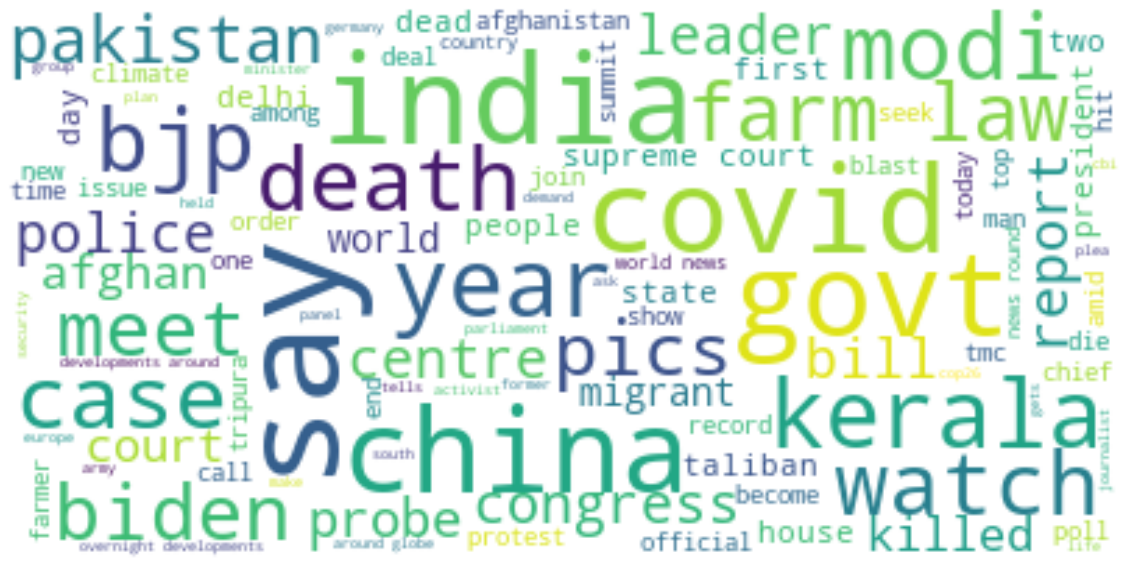

In [ ]:
plt.figure(figsize=(20,20))

wc = WordCloud(max_font_size=50, max_words=100, background_color="white")
wordcloud_df = wc.generate_from_text(' '.join(tok_df))

plt.imshow(wordcloud_df, interpolation="bilinear")
plt.axis("off")
plt.show()

# Codeclean up for sentiment analysis

Remove the special characters, numbers from the text. We can use the regular expression operations library 

https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/

In [ ]:
import re
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
finaldf['Cleaned Headlines'] = finaldf['Headlines'].apply(clean)
finaldf.head()

,Unnamed: 0,Date,Headlines,Cleaned Headlines
0,0,2021-11-25,Watch: Param Bir Singh appears before crime br...,Watch Param Bir Singh appears before crime bra...
1,1,2021-11-25,Chennai: Cops rescue woman being sexually assa...,Chennai Cops rescue woman being sexually assau...
2,2,2021-11-25,"If sentiments are hurt, read something better:...",If sentiments are hurt read something better D...
3,3,2021-11-25,INS Vela: Fourth Scorpene-class submarine comm...,INS Vela Fourth Scorpene class submarine commi...
4,4,2021-11-25,Threatening emails to Gautam Gambhir traced to...,Threatening emails to Gautam Gambhir traced to...


# POS tagging

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

finaldf['POS tagged'] = finaldf['Cleaned Headlines'].apply(token_stop_pos)
finaldf.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,Date,Headlines,Cleaned Headlines,POS tagged
0,0,2021-11-25,Watch: Param Bir Singh appears before crime br...,Watch Param Bir Singh appears before crime bra...,"[(Watch, n), (Param, n), (Bir, n), (Singh, n),..."
1,1,2021-11-25,Chennai: Cops rescue woman being sexually assa...,Chennai Cops rescue woman being sexually assau...,"[(Chennai, n), (Cops, n), (rescue, n), (woman,..."
2,2,2021-11-25,"If sentiments are hurt, read something better:...",If sentiments are hurt read something better D...,"[(sentiments, n), (hurt, v), (read, a), (somet..."
3,3,2021-11-25,INS Vela: Fourth Scorpene-class submarine comm...,INS Vela Fourth Scorpene class submarine commi...,"[(INS, n), (Vela, n), (Fourth, n), (Scorpene, ..."
4,4,2021-11-25,Threatening emails to Gautam Gambhir traced to...,Threatening emails to Gautam Gambhir traced to...,"[(Threatening, v), (emails, n), (Gautam, n), (..."


# Sentiment

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

finaldf['Lemma'] = finaldf['POS tagged'].apply(lemmatize)
finaldf.head()

,Unnamed: 0,Date,Headlines,Cleaned Headlines,POS tagged,Lemma
0,0,2021-11-25,Watch: Param Bir Singh appears before crime br...,Watch Param Bir Singh appears before crime bra...,"[(Watch, n), (Param, n), (Bir, n), (Singh, n),...",Watch Param Bir Singh appear crime branch Sa...
1,1,2021-11-25,Chennai: Cops rescue woman being sexually assa...,Chennai Cops rescue woman being sexually assau...,"[(Chennai, n), (Cops, n), (rescue, n), (woman,...",Chennai Cops rescue woman sexually assault m...
2,2,2021-11-25,"If sentiments are hurt, read something better:...",If sentiments are hurt read something better D...,"[(sentiments, n), (hurt, v), (read, a), (somet...",sentiment hurt read something well Delhi HC ...
3,3,2021-11-25,INS Vela: Fourth Scorpene-class submarine comm...,INS Vela Fourth Scorpene class submarine commi...,"[(INS, n), (Vela, n), (Fourth, n), (Scorpene, ...",INS Vela Fourth Scorpene class submarine com...
4,4,2021-11-25,Threatening emails to Gautam Gambhir traced to...,Threatening emails to Gautam Gambhir traced to...,"[(Threatening, v), (emails, n), (Gautam, n), (...",Threatening email Gautam Gambhir trace Pakis...


In [ ]:
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

finaldf = pd.DataFrame(finaldf[['Headlines', 'Lemma']])
finaldf.head()

,Headlines,Lemma
0,Watch: Param Bir Singh appears before crime br...,Watch Param Bir Singh appear crime branch Sa...
1,Chennai: Cops rescue woman being sexually assa...,Chennai Cops rescue woman sexually assault m...
2,"If sentiments are hurt, read something better:...",sentiment hurt read something well Delhi HC ...
3,INS Vela: Fourth Scorpene-class submarine comm...,INS Vela Fourth Scorpene class submarine com...
4,Threatening emails to Gautam Gambhir traced to...,Threatening email Gautam Gambhir trace Pakis...


In [ ]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
finaldf['Polarity'] = finaldf['Lemma'].apply(getPolarity) 
finaldf['Sentiment'] = finaldf['Polarity'].apply(analysis)
finaldf.head()

,Headlines,Lemma,Polarity,Sentiment
0,Watch: Param Bir Singh appears before crime br...,Watch Param Bir Singh appear crime branch Sa...,0.0,Neutral
1,Chennai: Cops rescue woman being sexually assa...,Chennai Cops rescue woman sexually assault m...,0.5,Positive
2,"If sentiments are hurt, read something better:...",sentiment hurt read something well Delhi HC ...,0.0,Neutral
3,INS Vela: Fourth Scorpene-class submarine comm...,INS Vela Fourth Scorpene class submarine com...,0.0,Neutral
4,Threatening emails to Gautam Gambhir traced to...,Threatening email Gautam Gambhir trace Pakis...,0.0,Neutral


664 251 180


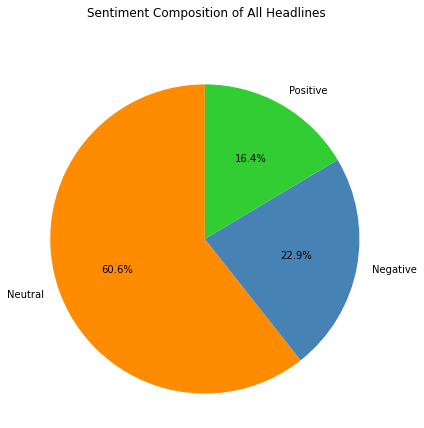

In [ ]:
# Get the total number of Neutral, Negative, and Positive news headlines
count = finaldf['Sentiment'].value_counts()

neutral = count[0]
negative = count[1]
positive = count[2]
print(neutral,negative,positive)

# Define labels
labels = 'Neutral', 'Negative', 'Positive'

# Define the data
sizes = [neutral, negative, positive]

# Plot Pie Chart
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Pie Chart settings
ax1.pie(sizes, 
        labels = labels, 
        autopct = '%1.1f%%', 
        startangle = 90, colors = ['darkorange', 'steelblue', 'limegreen'])

# Makes the Pie Chart round
ax1.axis('equal')

# Plot settings
plt.title('Sentiment Composition of All Headlines', y = 1.1)
plt.tight_layout()

plt.show()

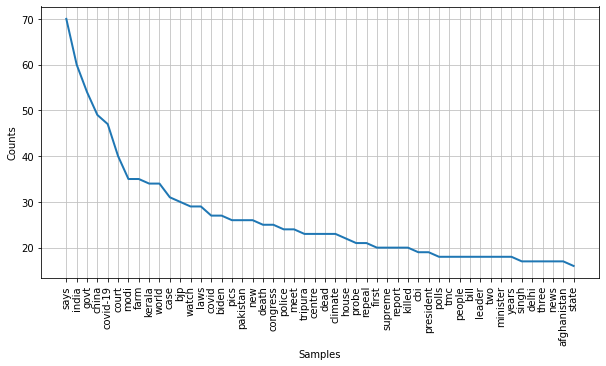

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_df)
Freq_dist_nltk.plot(50, cumulative=False) 

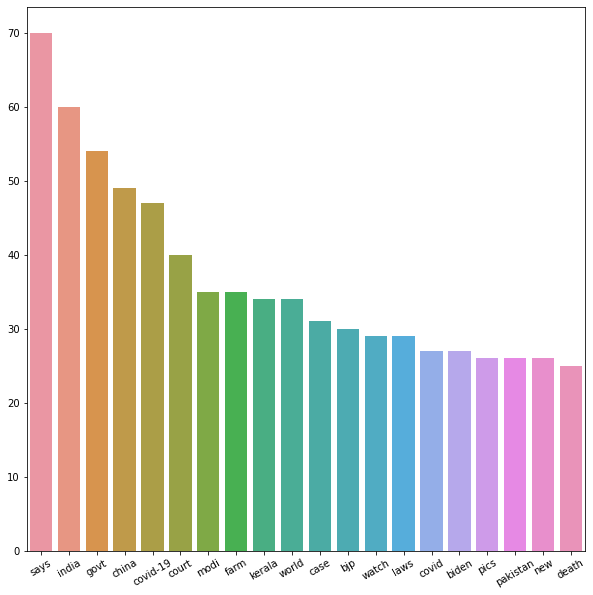

In [ ]:
all_fdist = nltk.FreqDist(tok_df).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);